In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy import stats

from datetime import datetime

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

In [2]:
df_customer = pd.read_csv("Case Study - Customer.csv",delimiter = ";")
df_product = pd.read_csv("Case Study - Product.csv",delimiter = ";")
df_store = pd.read_csv("Case Study - Store.csv",delimiter = ";")
df_transaction = pd.read_csv("Case Study - Transaction.csv",delimiter = ";")

## Load and Data Understanding

**Checking for Null Values, Data Types, Value in every Columns and Unique Value in ID**

In [3]:
pd.set_option('display.max_columns', None)
df_customer.sample(10)

,CustomerID,Age,Gender,Marital Status,Income
325,326,24,1,Single,"2,69"
268,269,39,1,Married,"6,3"
439,440,40,0,Married,"3,47"
123,124,28,0,Single,"5,12"
54,55,34,1,Married,"8,44"
162,163,47,1,Married,"6,3"
366,367,43,0,Married,"10,96"
45,46,36,1,Married,"8,31"
216,217,39,1,Single,"6,96"
342,343,29,0,Married,"2,26"


In [4]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [5]:
df_customer["CustomerID"].value_counts()

1      1
295    1
306    1
305    1
304    1
      ..
146    1
145    1
144    1
143    1
447    1
Name: CustomerID, Length: 447, dtype: int64

In [6]:
pd.set_option('display.max_columns', None)
df_product.sample(10)

,ProductID,Product Name,Price
7,P8,Oat,16000
1,P2,Ginger Candy,3200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
9,P10,Cheese Stick,15000
0,P1,Choco Bar,8800
2,P3,Crackers,7500
4,P5,Thai Tea,4200
3,P4,Potato Chip,12000
8,P9,Yoghurt,10000


In [7]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [8]:
df_product["ProductID"].value_counts()

P1     1
P2     1
P3     1
P4     1
P5     1
P6     1
P7     1
P8     1
P9     1
P10    1
Name: ProductID, dtype: int64

In [9]:
pd.set_option('display.max_columns', None)
df_store.sample(10)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
13,14,Priangan,Priangan,Modern Trade,"-5,45","105,26667"
12,13,Buana,Buana,General Trade,"-1,26916","116,825264"
10,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"
11,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [10]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [11]:
df_store["StoreID"].value_counts()

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: StoreID, dtype: int64

In [12]:
pd.set_option('display.max_columns', None)
df_transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [13]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [14]:
counts = df_transaction["TransactionID"].value_counts()
filtered_counts = counts[counts > 1]
print(filtered_counts)

TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR2135     2
TR49903    2
TR99533    2
TR36057    2
TR49304    2
Name: TransactionID, Length: 111, dtype: int64


**Checking for Data Duplicates**

In [15]:
df_customer.duplicated().sum()

0

In [16]:
df_product.duplicated().sum()

0

In [17]:
df_store.duplicated().sum()

0

In [18]:
df_transaction.duplicated().sum()

0

Summary :
1. There are some null values in the "Marital Status" column of the "df_customer" dataset.
2. The values in the "income" feature in the "df_customer" dataset are currently using a comma as a decimal separator; these should be replaced with a period and converted to float data type.
3. The values in the "Latitude" and "Longitude" features in the "df_store" dataset are currently using a comma as a decimal separator; these should be replaced with a period.
4. The "date" feature in the "df_transaction" dataset should be converted to a datetime data type.
5. Many values in the "TransactionID" feature in the "df_transaction" dataset are duplicated, even though "TransactionID" should be unique. In this case, we will select the records with the latest date.

## Data Cleaning & Data Preprocessing

**1. Handling Type Data & Correct Value**

In [19]:
df_customer['Income'] = df_customer['Income'].replace(',','.',regex=True).astype('float')

In [20]:
df_store['Latitude'] = df_store['Latitude'].replace(',','.',regex=True)
df_store['Longitude'] = df_store['Longitude'].replace(',','.',regex=True)

In [21]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

<ipython-input-21-433e6c690dce>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])


**2. Handling Duplicate Value**

In [22]:
df_transaction = df_transaction.sort_values(by=['TransactionID', 'Date'], ascending=[True, False])
df_transaction = df_transaction.drop_duplicates(subset='TransactionID', keep='first')

**3. Handling Missing Value**

Missing values ​​in Marital Status are filled in with "Other"

In [23]:
df_customer['Marital Status'] = df_customer['Marital Status'].fillna("Others")

## Combine All Data

In [24]:
df_merge = pd.merge(df_transaction,df_customer,on=["CustomerID"])

In [25]:
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=["ProductID"])

In [26]:
df_merge = pd.merge(df_merge,df_store,on=["StoreID"])

In [27]:
df_merge

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR10008,235,2022-05-21,P8,16000,2,32000,4,37,0,Married,5.35,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
1,TR39070,350,2022-06-23,P8,16000,2,32000,4,38,0,Single,7.95,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
2,TR8584,293,2022-09-14,P8,16000,3,48000,4,54,0,Married,10.40,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR69229,46,2022-05-07,P8,16000,2,32000,4,36,1,Married,8.31,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR88920,447,2022-01-16,P8,16000,1,16000,4,54,1,Married,20.37,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,TR28689,428,2022-08-09,P10,15000,2,30000,6,60,1,Married,4.49,Cheese Stick,Lingga,Lingga,Modern Trade,-5.135399,119.42379
4904,TR72929,357,2022-02-05,P10,15000,5,75000,6,48,0,Married,18.14,Cheese Stick,Lingga,Lingga,Modern Trade,-5.135399,119.42379
4905,TR48896,114,2022-06-24,P10,15000,5,75000,6,22,0,Single,3.14,Cheese Stick,Lingga,Lingga,Modern Trade,-5.135399,119.42379
4906,TR57592,409,2022-05-16,P10,15000,1,15000,6,47,0,Married,28.23,Cheese Stick,Lingga,Lingga,Modern Trade,-5.135399,119.42379


## Machine Learning Regression (Time Series)


In [50]:
df_merge_regresi = df_merge.groupby(['Date']).agg(
    Qty =('Qty', 'sum')
).reset_index()

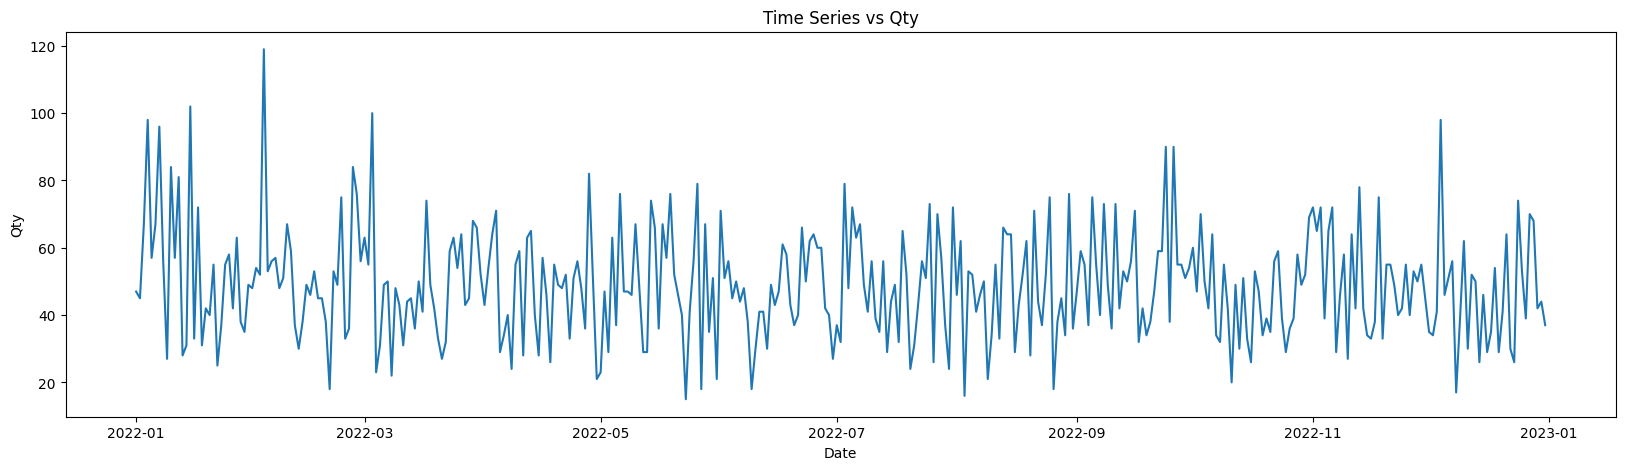

In [51]:
plt.figure(figsize=(20,5))
plt.plot(df_merge_regresi['Date'], df_merge_regresi['Qty'],linestyle='-')
plt.title('Time Series vs Qty')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.show()

Here we can see that the p-value is less than 0.05 this means we will take this series as stationary

divided into Data Training and Data Testing

In [65]:
cut_off = round(df_merge_regresi.shape[0] * 0.8)
data_train = df_merge_regresi[:cut_off]
data_test = df_merge_regresi[cut_off:].reset_index(drop=True)

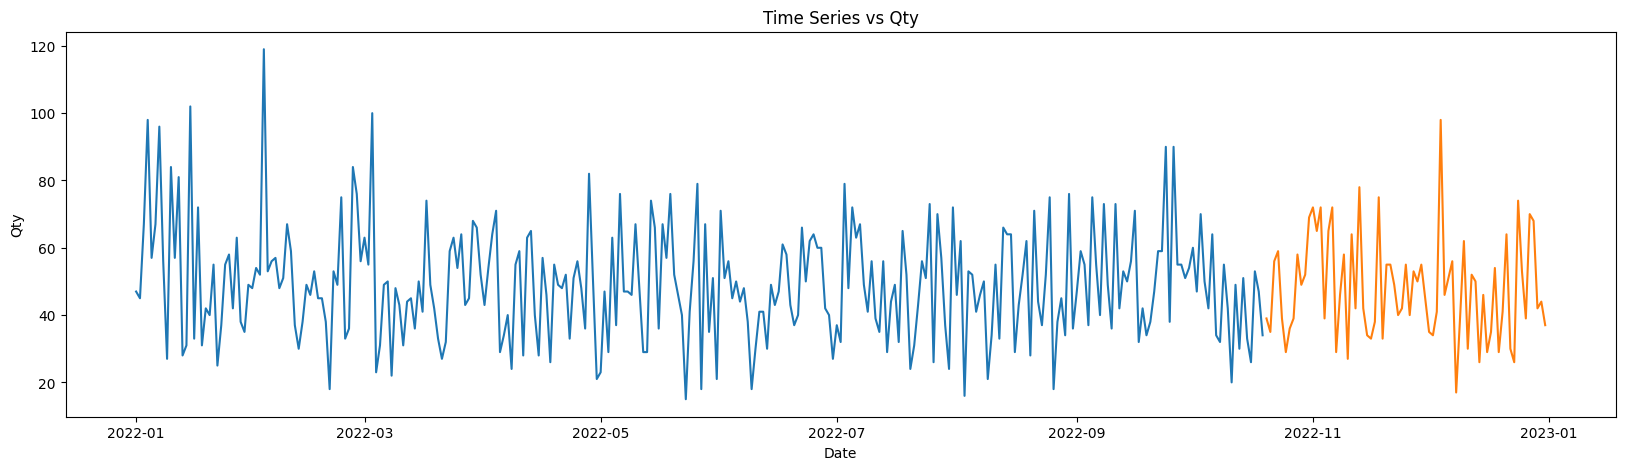

In [31]:
plt.figure(figsize=(20, 5))
plt.plot(data_train['Date'], data_train['Qty'],linestyle='-')
plt.plot(data_test['Date'], data_test['Qty'],linestyle='-')
plt.title('Time Series vs Qty')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


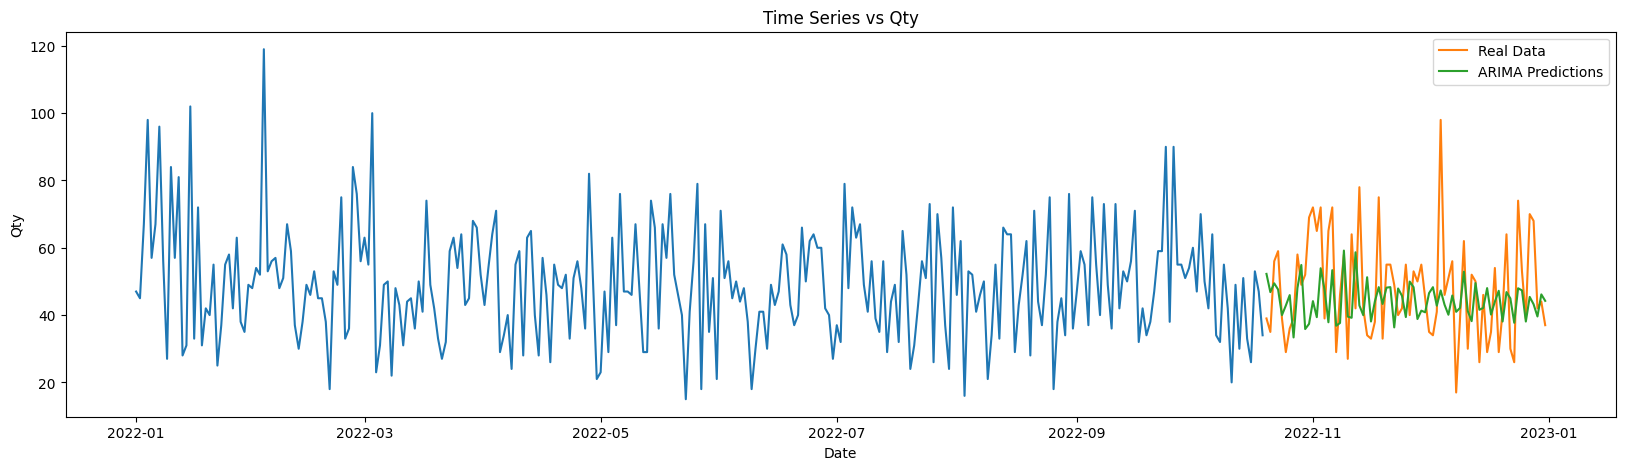

In [66]:
from statsmodels.tsa.arima.model import ARIMA

data_train = data_train.set_index('Date')
data_test = data_test.set_index('Date')


# Membuat model ARIMA
model = ARIMA(df_merge_regresi['Qty'], order=(48, 2, 1))
# Melatih model ARIMA
model_fit = model.fit()

y_pred = model_fit.get_forecast(len(data_test))

y_pred_data = y_pred.conf_int()
y_pred_data['Prediction'] = model_fit.predict(start=y_pred_data.index[0], end=y_pred_data.index[-1])
y_pred_data.index = data_test.index
y_pred_out = y_pred_data['Prediction']


plt.figure(figsize=(20, 5))
plt.plot(data_train['Qty'],linestyle='-')
plt.plot(data_test['Qty'],linestyle='-',label="Real Data")
plt.plot(y_pred_out,linestyle='-',label="ARIMA Predictions")
plt.title('Time Series vs Qty')
plt.xlabel('Date')
plt.ylabel('Qty')
plt.legend()
plt.show()

## Machine Learning Clustering

In [33]:
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [34]:
df_merge_clustering = df_merge.groupby(['CustomerID']).agg(
    total_trx =('TransactionID', 'count'),
    total_qty =('Qty', 'sum'),
    total_amount =('TotalAmount', 'sum',)
).reset_index()

In [35]:
df_merge_clustering = df_merge_clustering.drop(["CustomerID"],axis=1)

**Outlier Handling**

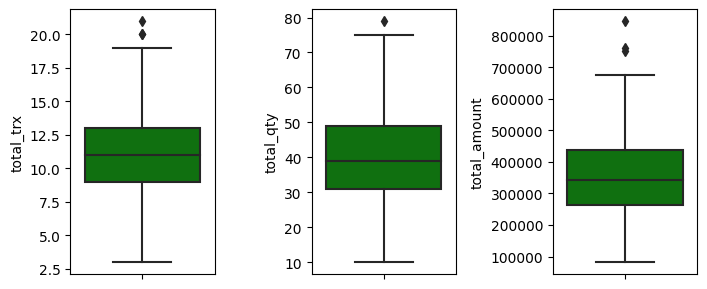

In [36]:
num = df_merge_clustering.select_dtypes(include=[np.number])
num_list = list(num)
plt.figure(figsize=(12, 3))
for i in range(0, len(num_list)):
    plt.subplot(int(len(num_list)/2), 5, i+1)
    sns.boxplot(y=df_merge_clustering[num_list[i]],color='green',orient='v')
    plt.tight_layout()

In [37]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_merge_clustering)}')

nums = ['total_trx', 'total_qty','total_amount']

fil_ent = np.array([True] * len(df_merge_clustering))

for col in nums:
    Q1 = df_merge_clustering[col].quantile(0.25)
    Q3 = df_merge_clustering[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df_merge_clustering[col] >= low_limit) & (df_merge_clustering[col] <= high_limit)) & fil_ent

df_merge_clustering = df_merge_clustering[fil_ent]

for col in df_merge_clustering:
    df_merge_clustering[col] = df_merge_clustering[col].replace([np.inf, -np.inf], 0)

print('Jumlah baris setelah memfilter outlier', len(df_merge_clustering))


Jumlah baris sebelum memfilter outlier: 447
Jumlah baris setelah memfilter outlier 443


<ipython-input-37-087077cb8e5e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_clustering[col] = df_merge_clustering[col].replace([np.inf, -np.inf], 0)


**Normalize**

In [38]:
df_merge_clustering_normalize = df_merge_clustering.copy()

In [39]:
scaler = MinMaxScaler()

ss_feature = ['total_trx', 'total_qty', 'total_amount']
df_merge_clustering_normalize[ss_feature] = scaler.fit_transform(df_merge_clustering_normalize[ss_feature].astype(float))

**Modelling using K-Means**

Elbow Score

In [40]:
data_model = df_merge_clustering_normalize.copy()

In [41]:
data_model

,total_trx,total_qty,total_amount
0,0.933333,0.793651,0.910913
1,0.600000,0.730159,0.505052
2,0.800000,0.730159,0.612664
3,0.466667,0.571429,0.370664
4,0.266667,0.269841,0.313574
...,...,...,...
442,0.866667,0.777778,0.678174
443,1.000000,0.825397,0.834119
444,0.933333,0.825397,0.755136
445,0.533333,0.507937,0.574099


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

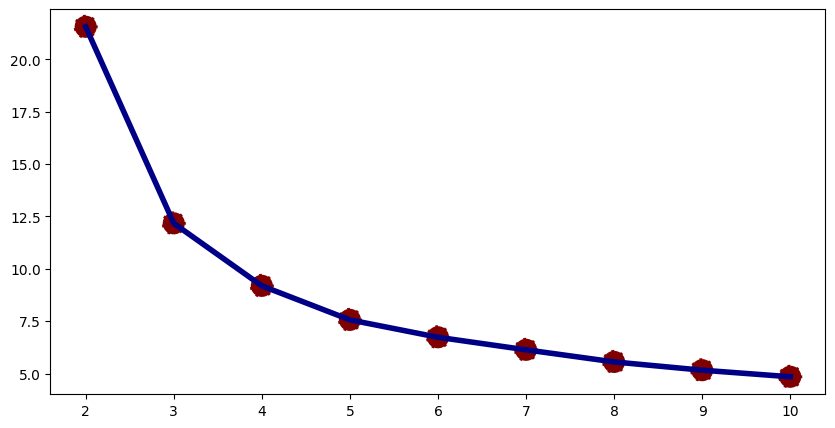

In [42]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_model)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(10, 5))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

Silhouette score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

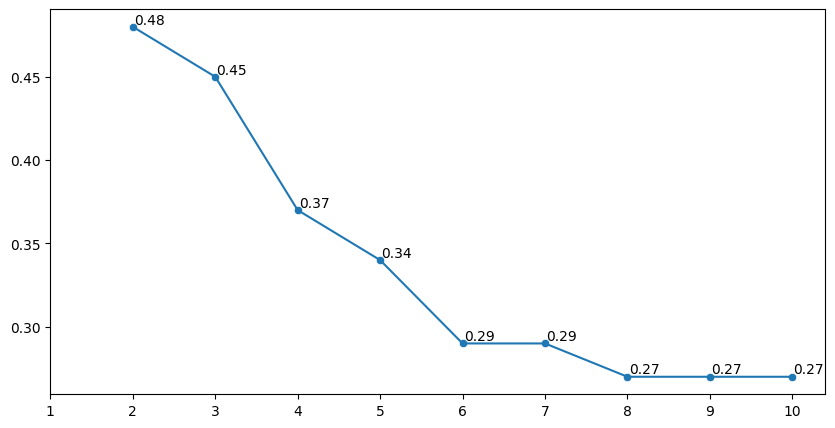

In [43]:
arr_silhouette_score = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(data_model)
    preds = kmeans.predict(data_model)
    score_euclidean = silhouette_score(data_model, preds, metric='euclidean')
    arr_silhouette_score.append(np.round(score_euclidean ,2))

x = range(2,11)

plt.figure(figsize=(10, 5))
sns.lineplot(x=x, y=arr_silhouette_score)
sns.scatterplot(x=x, y=arr_silhouette_score)

for i, label in enumerate(arr_silhouette_score):
    plt.text(x[i] + 0.2, arr_silhouette_score[i], label, ha='center', va='bottom')

plt.xticks(range(1,11 ,1))
plt.show()

It was found that the optimal number of clusters was 4, with a silhouette score of 0.46

In [44]:
model = KMeans(n_clusters=3, random_state=0).fit(data_model)
data_model['Cluster'] = model.labels_
df_merge_clustering['Cluster'] = model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
df_merge_clustering

,total_trx,total_qty,total_amount,Cluster
0,17,60,623300,2
1,12,56,382300,2
2,15,56,446200,2
3,10,46,302500,0
4,7,27,268600,1
...,...,...,...,...
442,16,59,485100,2
443,18,62,577700,2
444,17,62,530800,2
445,11,42,423300,0


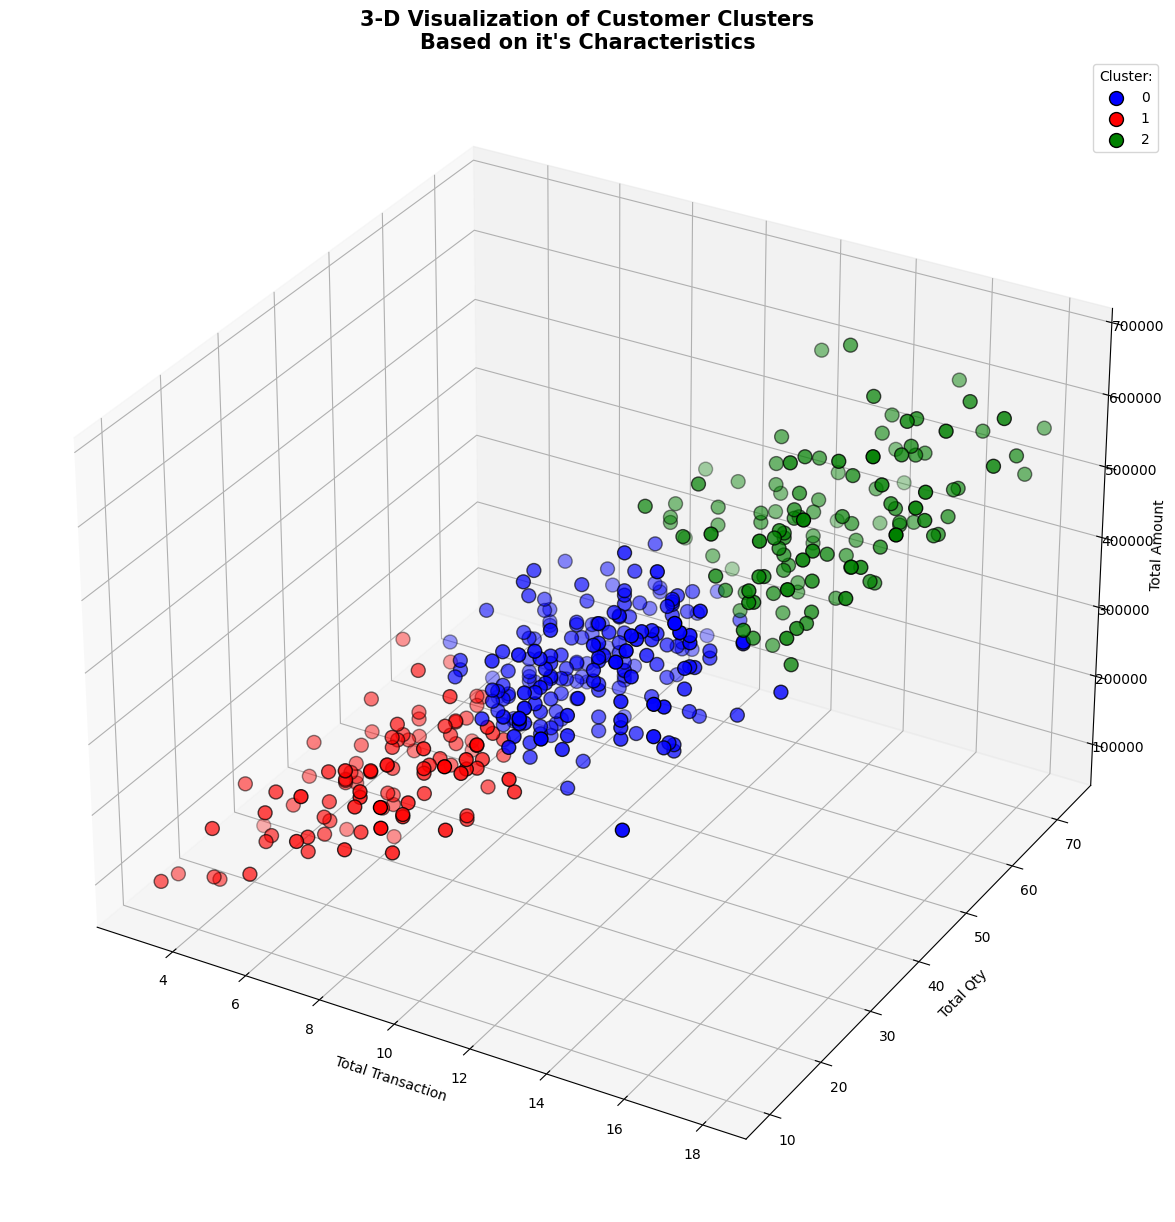

In [46]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_merge_clustering['total_trx'][df_merge_clustering.Cluster == 0], df_merge_clustering['total_qty'][df_merge_clustering.Cluster == 0], df_merge_clustering['total_amount'][df_merge_clustering.Cluster == 0], c='blue', s=100, edgecolor='black', label='0')
ax.scatter(df_merge_clustering['total_trx'][df_merge_clustering.Cluster == 1], df_merge_clustering['total_qty'][df_merge_clustering.Cluster == 1], df_merge_clustering['total_amount'][df_merge_clustering.Cluster == 1], c='red', s=100, edgecolor='black', label='1')
ax.scatter(df_merge_clustering['total_trx'][df_merge_clustering.Cluster == 2], df_merge_clustering['total_qty'][df_merge_clustering.Cluster == 2], df_merge_clustering['total_amount'][df_merge_clustering.Cluster == 2], c='green', s=100, edgecolor='black',  label='2')
plt.xlabel('Total Transaction')
plt.ylabel('Total Qty')
ax.set_zlabel('Total Amount')
plt.legend(title='Cluster:')
plt.show()

In [47]:
display(df_merge_clustering.groupby('Cluster').agg(['count','mean','median','max']))

total_trx                       total_qty                        \
            count       mean median max     count       mean median max   
Cluster                                                                   
0             211  10.701422   11.0  15       211  38.331754   38.0  53   
1             108   7.009259    7.0  10       108  24.759259   25.0  37   
2             124  14.620968   15.0  18       124  54.911290   54.0  73   

        total_amount                                   
               count           mean    median     max  
Cluster                                                
0                211  337079.146919  335000.0  476200  
1                108  208935.185185  212950.0  322600  
2                124  496817.741935  490100.0  676200